The relaxation method is  used to solve partial differential equations (PDEs), particularly elliptic equations such as Laplace's equation and Poisson's equation. It is an iterative process where a guess for the solution is refined step-by-step until convergence to an acceptable solution is achieved.


<b>Iterative Refinement: </b><br>

Start with an initial guess for the solution over the grid points.<br>
Use an update rule to gradually improve the guess based on the discretized equation.<br>

<b>Discrete Approximation: </b><br>

The domain is discretized into a grid.<br>
For Laplace's equation, $\nabla^2 u $, the finite difference form in two dimensions is: <br>

$u_{ij}=\frac{1}{4}(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1})$ <br>

This formula is used iteratively to update the value of $u_{i,j}$ at each grid point.

<b>Convergence:</b><br>

The iterations continue until the changes between successive steps are below a predefined tolerance, indicating convergence to the solution. <br>

<b>Boundary Conditions:</b> <br>

Boundary values are held fixed throughout the iterations, ensuring the solution adheres to physical constraints.



The relaxation method can effectively solve the Poisson equation, which is a partial differential equation of the form: <br>
             $\nabla^2 u = f(x,y)$ <br>
where  $f(x,y)$ s a known source term, and $u(x,y)$ is the unknown function to be solved for. In two dimensions, the equation expands to: 

$\frac{\partial u^2}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=f(x,y)$ 

The relaxation method iteratively improves an initial guess of the solution u(x,y) until convergence.

Consider the Poisson equation : <br>

$\nabla^2 \phi (x,y) = -\rho(x,y)/\epsilon_0$ <br>

from electrostatic on a rectangular geometry with $x\in [0,L_x]$ and $y\in[0,l_y]$. Write a program to solve this equation using relaxtion method. <br>
(a) Test your program with $\rho(x,y)=0, \phi(0,y)=\phi(L_x,y)=\phi(x,0),\phi(x,L_y)=1V$, $L_x=1 m$ and $L_y=1.5 m$ <br>
(b) Test your program with $\rho(x,y)/\epsilon_0=1 V/m^2, \phi(0,y)=\phi(L_x,y)=\phi(x,0),\phi(x,L_y)=0$, $L_x=1 m$ and $L_y=1 m$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Apply boundary condition and set iteration

In [6]:
def solve_poisson(Lx, Ly, dx, dy, rho, epsilon_0, phi_boundary, max_iter=10000, tol=1e-6):
    nx, ny = int(Lx / dx) + 1, int(Ly / dy) + 1
    phi = np.zeros((nx, ny))

    # Apply boundary conditions
    phi[0, :] = phi_boundary["left"]
    phi[-1, :] = phi_boundary["right"]
    phi[:, 0] = phi_boundary["bottom"]
    phi[:, -1] = phi_boundary["top"]

    # Relaxation loop
    for iteration in range(max_iter):
        phi_old = phi.copy()

        # Update potential using the finite difference formula
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                phi[i, j] = 0.25 * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]
                    - (dx * dy) ** 2 * rho[i, j] / epsilon_0
                )

        # Check for convergence
        error = np.max(np.abs(phi - phi_old))
        if error < tol:
            print(f"Converged after {iteration} iterations with error {error}")
            break
    else:
        print(f"Did not converge after {max_iter} iterations")

    return phi

In [7]:
# Problem parameters
Lx, Ly = 1.0, 1.5  # Domain size in meters
dx, dy = 0.05, 0.05  # Grid spacing in meters
epsilon_0 = 1.0  # Permittivity


In [8]:
# Case (a): rho(x, y) = 0, boundary values as given
rho_a = np.zeros((int(Lx / dx) + 1, int(Ly / dy) + 1))
phi_boundary_a = {
    "left": 1.0,
    "right": 1.0,
    "bottom": 0.0,
    "top": 0.0,
}

phi_a = solve_poisson(Lx, Ly, dx, dy, rho_a, epsilon_0, phi_boundary_a)

Converged after 555 iterations with error 9.89384463023768e-07


In [9]:
# Case (b): rho(x, y)/epsilon_0 = 1 V/m^2, all boundaries at 0 V
rho_b = np.ones((int(Lx / dx) + 1, int(Ly / dy) + 1)) * epsilon_0
phi_boundary_b = {
    "left": 0.0,
    "right": 0.0,
    "bottom": 0.0,
    "top": 0.0,
}

phi_b = solve_poisson(Lx, Ly, dx, dy, rho_b, epsilon_0, phi_boundary_b)

Converged after 91 iterations with error 9.894351024664668e-07


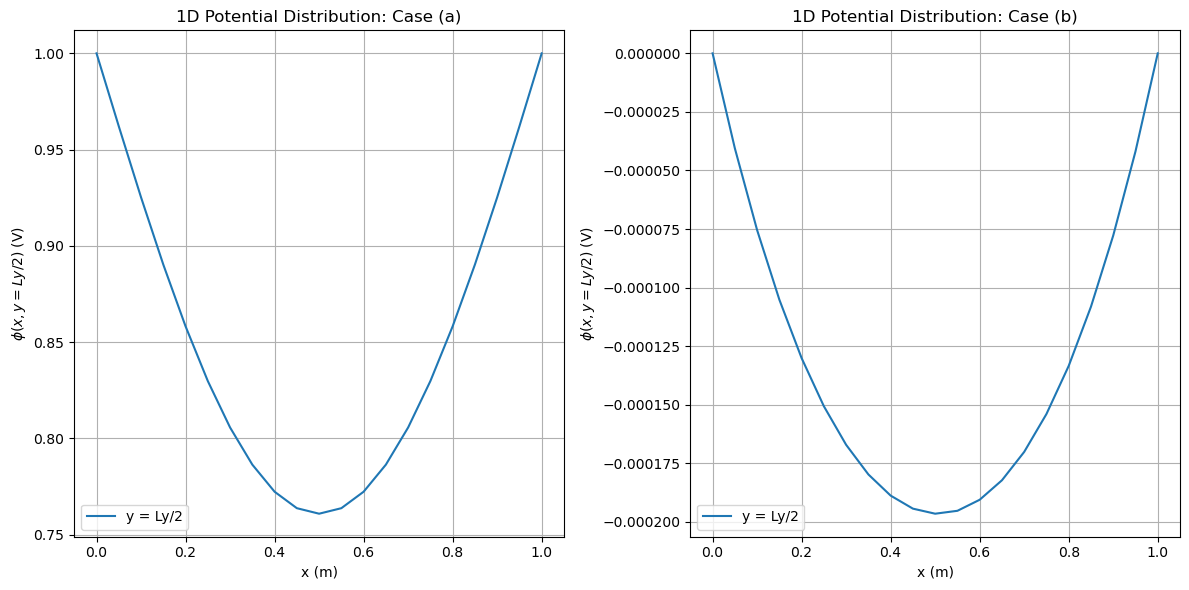

In [10]:
# Plotting the results side by side
x = np.linspace(0, Lx, int(Lx / dx) + 1)
plt.figure(figsize=(12, 6))

# Plot for Case (a)
plt.subplot(1, 2, 1)
plt.plot(x, phi_a[:, int(0.5 * (int(Ly / dy) + 1))], label="y = Ly/2")
plt.title("1D Potential Distribution: Case (a)")
plt.xlabel("x (m)")
plt.ylabel("$\phi(x, y=Ly/2)$ (V)")
plt.grid()
plt.legend()

# Plot for Case (b)
plt.subplot(1, 2, 2)
plt.plot(x, phi_b[:, int(0.5 * (int(Ly / dy) + 1))], label="y = Ly/2")
plt.title("1D Potential Distribution: Case (b)")
plt.xlabel("x (m)")
plt.ylabel("$\phi(x, y=Ly/2)$ (V)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()